In [55]:
import networkx as nx
%matplotlib inline
import pybel 
import openbabel as ob

from IPython.display import display, HTML, SVG
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    display(HTML('<img src onerror="{}">'.format(script)))
    
colour_dict = {6:'#000000',#carbon - black
               7:'#4169E1',#nitrogen - blue
               1:'#F5F5F5',#hydrogen - white
               16:'#FFFF99',#sulphur - yellow
               8:'#DC143C',#oxygen - red
               17:'#228B22',#cholorine - green
               15:'#FF8C00'}#phosphorous - orange

def map_colour_node(atomicNum):
    if atomicNum in colour_dict.keys():
        return colour_dict[atomicNum]
    else:
        return '#800000'
    
def genMOL(smi):
    return pybel.readstring('smi',smi)

def mol_to_networkxgraph(mol):
    edges = []
    bond_orders = []
    node_colours = []
    #data_dict = {}
    for bond in ob.OBMolBondIter(mol.OBMol):
        bondorders.append(bond.GetBO())
        edges.append( (bond.beginAtomidx - 1, bond.endAtomIdx - 1) )
        #data_dict.update({bond.GetBeginAtomIdx():
                          #(bond.GetBeginAtom().GetAtomicNum(),
                          # map_colour_node(bond.GetBeginAtom().GetAtomicNum()) ) })
        g = nx.Graph()
        g.add_edges_from(edges)
    for i,atom in enumerate(mol):
        #node_colours.append(map_colour_node(atom.atomicnum))
        g.add_node(i,colour_atom=map_colour_node(atom.atomicnum),size=atom.atomicmass)
        #print(f"{g.node[i]['colour_atom']} - {g.node[i]['size']}")
    return (g,bondorders) 

def genMolNodes(mol):
    nodes = []
    for i,atom in enumerate(mol):
        atomicNum = atom.atomicnum
        data = {'name':str(i+1),'colour_atom':map_colour_node(atomicNum),"size":round(atom.atomicmass),"atomicNum":atomicNum}
        nodes.append(data)
    return nodes

def genMolLinks(mol):
    links = []
    for bond in ob.OBMolBondIter(mol.OBMol):
        bo = bond.GetBO()
        if bo != 1:
            for i in range(bo):
                data = {'source':bond.GetBeginAtomIdx()-1,'target':bond.GetEndAtomIdx()-1}
                links.append(data)
        else:
            data = {'source':bond.GetBeginAtomIdx()-1,'target':bond.GetEndAtomIdx()-1}
            links.append(data)
    return links

def dplySVGmol(smi,width=450,showNum=False):
    mol = genMOL(smi)
    display(SVG(mol.write('svg',opt={'P':width,'i':showNum})))

In [62]:
mol = genMOL(smi)
mol_myc = genMOL(mycgranol)
doxo = 'C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](Cc3c2c(c4c(c3O)C(=O)c5cccc(c5C4=O)OC)O)(C(=O)CO)O)N)O'
mol_dox = genMOL(doxo)
#data = mol_to_networkxgraph(mol)

In [59]:
genMolNodes(mol_myc)

[{'name': '1', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '2', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '3', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '4', 'colour_atom': '#F5F5F5', 'size': 1, 'atomicNum': 1},
 {'name': '5', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '6', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '7', 'colour_atom': '#F5F5F5', 'size': 1, 'atomicNum': 1},
 {'name': '8', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '9', 'colour_atom': '#DC143C', 'size': 16, 'atomicNum': 8},
 {'name': '10', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '11', 'colour_atom': '#DC143C', 'size': 16, 'atomicNum': 8},
 {'name': '12', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '13', 'colour_atom': '#F5F5F5', 'size': 1, 'atomicNum': 1},
 {'name': '14', 'colour_atom': '#000000', 'size': 12, 'atomicNum': 6},
 {'name': '15', 'c

In [63]:
genMolLinks(mol_dox)

[{'source': 0, 'target': 1},
 {'source': 1, 'target': 2},
 {'source': 1, 'target': 3},
 {'source': 3, 'target': 4},
 {'source': 3, 'target': 5},
 {'source': 5, 'target': 6},
 {'source': 5, 'target': 7},
 {'source': 7, 'target': 8},
 {'source': 8, 'target': 9},
 {'source': 8, 'target': 10},
 {'source': 1, 'target': 10},
 {'source': 8, 'target': 11},
 {'source': 11, 'target': 12},
 {'source': 12, 'target': 13},
 {'source': 12, 'target': 14},
 {'source': 14, 'target': 15},
 {'source': 15, 'target': 16},
 {'source': 16, 'target': 17},
 {'source': 17, 'target': 18},
 {'source': 17, 'target': 18},
 {'source': 12, 'target': 18},
 {'source': 18, 'target': 19},
 {'source': 19, 'target': 20},
 {'source': 19, 'target': 20},
 {'source': 20, 'target': 21},
 {'source': 21, 'target': 22},
 {'source': 21, 'target': 22},
 {'source': 17, 'target': 22},
 {'source': 22, 'target': 23},
 {'source': 21, 'target': 24},
 {'source': 24, 'target': 25},
 {'source': 24, 'target': 25},
 {'source': 24, 'target': 26}

In [50]:
lk = [{'source': u[0], 'target': u[1]} for u in data[0].edges() ]
nd = [{'name': str(i), 'colour_atom': data[0].node[i]['colour_atom']} for i in data[0].nodes()]

In [51]:
nd

[{'name': '0', 'colour_atom': '#000000'},
 {'name': '1', 'colour_atom': '#000000'},
 {'name': '2', 'colour_atom': '#000000'},
 {'name': '3', 'colour_atom': '#000000'},
 {'name': '4', 'colour_atom': '#000000'},
 {'name': '5', 'colour_atom': '#000000'},
 {'name': '6', 'colour_atom': '#DC143C'},
 {'name': '7', 'colour_atom': '#DC143C'},
 {'name': '8', 'colour_atom': '#DC143C'},
 {'name': '9', 'colour_atom': '#000000'},
 {'name': '10', 'colour_atom': '#DC143C'},
 {'name': '11', 'colour_atom': '#000000'},
 {'name': '12', 'colour_atom': '#000000'},
 {'name': '13', 'colour_atom': '#000000'},
 {'name': '14', 'colour_atom': '#000000'},
 {'name': '15', 'colour_atom': '#000000'},
 {'name': '16', 'colour_atom': '#000000'},
 {'name': '17', 'colour_atom': '#DC143C'},
 {'name': '18', 'colour_atom': '#000000'},
 {'name': '19', 'colour_atom': '#DC143C'},
 {'name': '20', 'colour_atom': '#DC143C'},
 {'name': '21', 'colour_atom': '#DC143C'}]

In [68]:
data[0].edges()

EdgeView([(0, 1), (0, 5), (1, 2), (1, 18), (2, 3), (2, 16), (3, 4), (3, 8), (4, 5), (4, 7), (5, 6), (8, 9), (9, 10), (9, 11), (11, 12), (11, 16), (12, 13), (13, 14), (13, 21), (14, 15), (14, 20), (15, 16), (15, 17), (17, 18), (18, 19)])

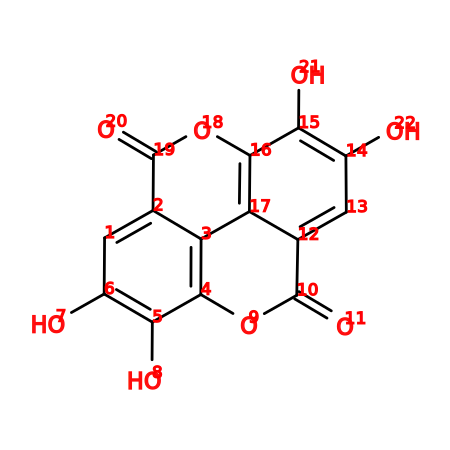

In [6]:
smi = 'C1=C2C3=C(C(=C1O)O)OC(=O)C4=CC(=C(C(=C43)OC2=O)O)O'
dplySVGmol(smi,showNum=True)

In [71]:
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4)

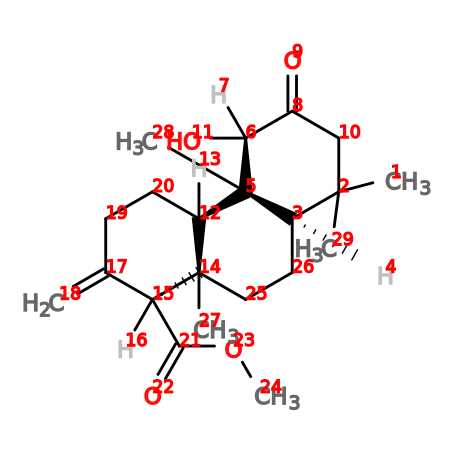

In [57]:
mycgranol = 'C[C@]1([C@@H]2[C@@]([C@@H](C(=O)C1)O)([C@H]3[C@@]([C@H](C(=C)CC3)C(=O)OC)(CC2)C)C)C'
dplySVGmol(mycgranol)

In [75]:
myc = mol_to_networkxgraph(genMOL(mycgranol))

In [76]:
[{'source': u[0]+1, 'target': u[1]+1, 'bond':myc[1][i]} for i,u in enumerate(myc[0].edges()) ]

[{'source': 1, 'target': 2, 'bond': 1},
 {'source': 2, 'target': 3, 'bond': 1},
 {'source': 2, 'target': 10, 'bond': 1},
 {'source': 2, 'target': 29, 'bond': 1},
 {'source': 3, 'target': 4, 'bond': 1},
 {'source': 3, 'target': 5, 'bond': 1},
 {'source': 3, 'target': 26, 'bond': 1},
 {'source': 5, 'target': 6, 'bond': 2},
 {'source': 5, 'target': 12, 'bond': 1},
 {'source': 5, 'target': 28, 'bond': 1},
 {'source': 6, 'target': 7, 'bond': 1},
 {'source': 6, 'target': 8, 'bond': 1},
 {'source': 6, 'target': 11, 'bond': 1},
 {'source': 8, 'target': 9, 'bond': 1},
 {'source': 8, 'target': 10, 'bond': 1},
 {'source': 12, 'target': 13, 'bond': 1},
 {'source': 12, 'target': 14, 'bond': 1},
 {'source': 12, 'target': 20, 'bond': 2},
 {'source': 14, 'target': 15, 'bond': 1},
 {'source': 14, 'target': 25, 'bond': 1},
 {'source': 14, 'target': 27, 'bond': 1},
 {'source': 15, 'target': 16, 'bond': 1},
 {'source': 15, 'target': 17, 'bond': 2},
 {'source': 15, 'target': 21, 'bond': 1},
 {'source': 17,

None

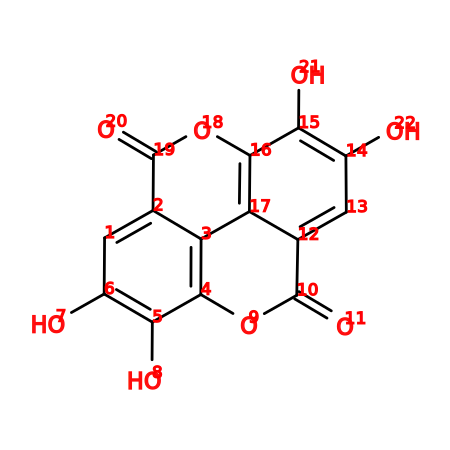

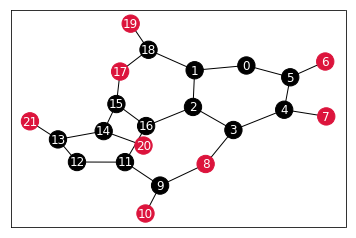

In [33]:
display(nx.draw_networkx(data[0],node_color=colour_map,font_color='white'))
dplySVGmol(smi)

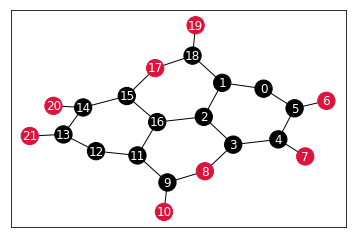

In [21]:
netx_graph = nx.draw_networkx(data[0],node_color=colour_map,font_color='white')

In [115]:
dir(a)

['OBAtom',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'atomicmass',
 'atomicnum',
 'cidx',
 'coordidx',
 'coords',
 'exactmass',
 'formalcharge',
 'heavyvalence',
 'heterovalence',
 'hyb',
 'idx',
 'implicitvalence',
 'isotope',
 'partialcharge',
 'residue',
 'spin',
 'type',
 'valence',
 'vector']

In [15]:
for a in mol:
    print(f"idx:{a.idx}, hyb:{a.hyb}, valence:{a.valence}, heaveyvalnce:{a.heavyvalence}, heterovalence:{a.heterovalence}")

idx:1, hyb:3, valence:1, heaveyvalnce:1, heterovalence:0
idx:2, hyb:3, valence:4, heaveyvalnce:4, heterovalence:0
idx:3, hyb:3, valence:4, heaveyvalnce:3, heterovalence:0
idx:4, hyb:0, valence:1, heaveyvalnce:1, heterovalence:0
idx:5, hyb:3, valence:4, heaveyvalnce:4, heterovalence:0
idx:6, hyb:3, valence:4, heaveyvalnce:3, heterovalence:1
idx:7, hyb:0, valence:1, heaveyvalnce:1, heterovalence:0
idx:8, hyb:2, valence:3, heaveyvalnce:3, heterovalence:1
idx:9, hyb:2, valence:1, heaveyvalnce:1, heterovalence:0
idx:10, hyb:3, valence:2, heaveyvalnce:2, heterovalence:0
idx:11, hyb:3, valence:1, heaveyvalnce:1, heterovalence:0
idx:12, hyb:3, valence:4, heaveyvalnce:3, heterovalence:0
idx:13, hyb:0, valence:1, heaveyvalnce:1, heterovalence:0
idx:14, hyb:3, valence:4, heaveyvalnce:4, heterovalence:0
idx:15, hyb:3, valence:4, heaveyvalnce:3, heterovalence:0
idx:16, hyb:0, valence:1, heaveyvalnce:1, heterovalence:0
idx:17, hyb:2, valence:3, heaveyvalnce:3, heterovalence:0
idx:18, hyb:2, valence:

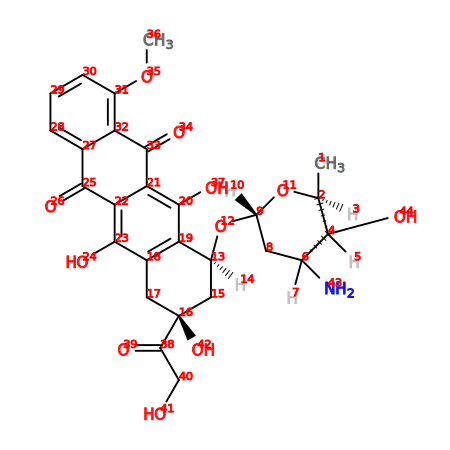

In [60]:
dplySVGmol(doxo)

In [62]:
doxo = 'C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](Cc3c2c(c4c(c3O)C(=O)c5cccc(c5C4=O)OC)O)(C(=O)CO)O)N)O'
doxo_cano = 'CC1C(C(CC(O1)OC2CC(CC3=C2C(=C4C(=C3O)C(=O)C5=C(C4=O)C(=CC=C5)OC)O)(C(=O)CO)O)N)O'
mo = genMOL(doxo)
for i,bond in enumerate(ob.OBMolBondIter(mo.OBMol)):
    if bond.GetBO() == 2:
            print(f"{i} - begin:{bond.GetBeginAtomIdx()}, end:{bond.GetEndAtomIdx()}, valence:{bond.GetBeginAtom().GetValence()}, BO:{bond.GetBO()}")
    #print(f"{bond.GetIdx()+1}, {bond.GetBeginAtom().HighestBondOrder()}")

18 - begin:18, end:19, valence:3, BO:2
21 - begin:20, end:21, valence:3, BO:2
23 - begin:22, end:23, valence:3, BO:2
27 - begin:25, end:26, valence:3, BO:2
29 - begin:27, end:28, valence:3, BO:2
31 - begin:29, end:30, valence:2, BO:2
33 - begin:31, end:32, valence:3, BO:2
37 - begin:33, end:34, valence:3, BO:2
42 - begin:38, end:39, valence:3, BO:2


In [13]:
mol = genMOL(mycgranol)
for bond in ob.OBMolBondIter(mol.OBMol):
    print(f"idx:{bond.GetIdx()+1}||BO:{bond.GetBondOrder()}||Single:{bond.IsSingle()}||Double:{bond.IsDouble()}||Triple:{bond.IsTriple()}")

idx:1||BO:1||Single:True||Double:False||Triple:False
idx:2||BO:1||Single:True||Double:False||Triple:False
idx:3||BO:1||Single:True||Double:False||Triple:False
idx:4||BO:1||Single:True||Double:False||Triple:False
idx:5||BO:1||Single:True||Double:False||Triple:False
idx:6||BO:1||Single:True||Double:False||Triple:False
idx:7||BO:1||Single:True||Double:False||Triple:False
idx:8||BO:2||Single:False||Double:True||Triple:False
idx:9||BO:1||Single:True||Double:False||Triple:False
idx:10||BO:1||Single:True||Double:False||Triple:False
idx:11||BO:1||Single:True||Double:False||Triple:False
idx:12||BO:1||Single:True||Double:False||Triple:False
idx:13||BO:1||Single:True||Double:False||Triple:False
idx:14||BO:1||Single:True||Double:False||Triple:False
idx:15||BO:1||Single:True||Double:False||Triple:False
idx:16||BO:1||Single:True||Double:False||Triple:False
idx:17||BO:1||Single:True||Double:False||Triple:False
idx:18||BO:2||Single:False||Double:True||Triple:False
idx:19||BO:1||Single:True||Double:Fal

In [32]:
dir(bond_orders.GetBeginAtom())

['AddBond',
 'AddResidue',
 'AverageBondAngle',
 'BOSum',
 'BeginBond',
 'BeginBonds',
 'BeginData',
 'BeginNbrAtom',
 'ClassDescription',
 'Clear',
 'ClearBond',
 'ClearCoordPtr',
 'CloneData',
 'CountBondsOfOrder',
 'CountFreeOxygens',
 'CountFreeSulfurs',
 'CountRingBonds',
 'DataSize',
 'DecrementImplicitValence',
 'DeleteBond',
 'DeleteData',
 'DeleteResidue',
 'DoTransformations',
 'Duplicate',
 'EndBonds',
 'EndData',
 'ExplicitHydrogenCount',
 'ForceImplH',
 'ForceNoH',
 'GetAllData',
 'GetAngle',
 'GetAtomicMass',
 'GetAtomicNum',
 'GetBond',
 'GetCIdx',
 'GetCoordinate',
 'GetCoordinateIdx',
 'GetData',
 'GetDistance',
 'GetExactMass',
 'GetFormalCharge',
 'GetHeteroValence',
 'GetHvyValence',
 'GetHyb',
 'GetId',
 'GetIdx',
 'GetImplicitValence',
 'GetIndex',
 'GetIsotope',
 'GetNewBondVector',
 'GetNextAtom',
 'GetParent',
 'GetPartialCharge',
 'GetResidue',
 'GetSpinMultiplicity',
 'GetTitle',
 'GetType',
 'GetValence',
 'GetVector',
 'GetX',
 'GetY',
 'GetZ',
 'HasAlphaBe

In [37]:
actylene = 'C#C'
mac = pybel.readstring('smi',actylene)

In [36]:
bond_orders = [b for b in ob.OBMolBondIter(mol.OBMol)]
bo = bond_orders[0]
dir(bo)

['Aromatic',
 'BeginData',
 'CisOrTrans',
 'ClassDescription',
 'Clear',
 'CloneData',
 'Closure',
 'DataSize',
 'DeleteData',
 'DoTransformations',
 'EndData',
 'FindSmallestRing',
 'GetAllData',
 'GetBO',
 'GetBeginAtom',
 'GetBeginAtomIdx',
 'GetBondOrder',
 'GetData',
 'GetEndAtom',
 'GetEndAtomIdx',
 'GetEquibLength',
 'GetFlags',
 'GetId',
 'GetIdx',
 'GetLength',
 'GetNbrAtom',
 'GetNbrAtomIdx',
 'GetParent',
 'GetTitle',
 'HasData',
 'Hash',
 'IsAmide',
 'IsAromatic',
 'IsCarbonyl',
 'IsCisOrTrans',
 'IsClosure',
 'IsDouble',
 'IsDoubleBondGeometry',
 'IsDown',
 'IsEster',
 'IsHash',
 'IsInRing',
 'IsKDouble',
 'IsKSingle',
 'IsKTriple',
 'IsPrimaryAmide',
 'IsRotor',
 'IsSecondaryAmide',
 'IsSingle',
 'IsTertiaryAmide',
 'IsTriple',
 'IsUp',
 'IsWedge',
 'IsWedgeOrHash',
 'Ring',
 'Set',
 'SetAromatic',
 'SetBO',
 'SetBegin',
 'SetBondOrder',
 'SetClosure',
 'SetDown',
 'SetEnd',
 'SetHash',
 'SetId',
 'SetIdx',
 'SetInRing',
 'SetKDouble',
 'SetKSingle',
 'SetKTriple',
 'SetL